In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Короче посмотри на датасет:
1) room_and_street // в этой фиче нужно поделить column на number_of_rooms и street_name

2) num of floors // в этой фиче тоже нужно поделить на два (в каком этаже находится сама квартира) и (общее кол этажей в зданий)

3) sqrft // первая цифра это общая площадь квартиры а вторая это площадь кухни(также подели на два колумна)

4) description // там есть инфо по материалу стены(монолитный,кирпичный,панельный) через эти категориальные данные нужно сделать новую фичу(type of wall)

5) rieltor // просто тоже превратить в категориальную данные(риэлтор,агенство,компания и частное лицо)

6) price // тут понятно я думаю 

ДОЛЖНО ВЫЙТИ 10 ФИЧЕЙ(num_of_rooms, district, num_of_floors, sum_of_floors, year, overall_area, area_of_kitchen, type_of_wall, rieltor, price)

In [2]:
df = pd.read_csv('final_df_all_districts.csv')
df.head()

,rooms_and_street,num_of_floors,sqrft,year_of_build,description,date,rieltor,price,district
0,"3-комнатная квартира, Манаса, 22/2 - Кудайберд...",3/10 этаж,площадь: 80/13,год постройки: 2012,"\n ЖК Омир,...",Вчера,\nЧастное лицо\n,\nСрочно!\n ...,Алматы
1,"2-комнатная квартира, Тауелсыздык, 34/1",13/17 этаж,площадь: 70/11.2,год постройки: 2010,\n ЖК Алтын...,15.05.24,\nЧастное лицо\n,\n\n 26...,Алматы
2,"2-комнатная квартира, Кошкарбаева, 36",10/21 этаж,площадь: 63.3/9.9,год постройки: 2023,\n ЖК Tomir...,02.05.24,\nNur Astana Kurylys (застройщик)\n,\n ...,Алматы
3,"3-комнатная квартира, Кошкарбаева",6/23 этаж,площадь: 100,год постройки: 2014,\n ЖК Хайви...,Сегодня,\nKazRealty (агентство)\n,\n ...,Алматы
4,"1-комнатная квартира, Болекпаева, 22 - Байтурс...",7/9 этаж,площадь: 38/10,год постройки: 2023,\n ЖК Aibik...,Сегодня,\nЧастное лицо\n,\n ...,Алматы


In [3]:
df.shape

(20768, 9)

# Data Preprocessing

Dividing columns into specific columns

In [4]:
df[['num_of_rooms','street_name','delete','delete2']] = df['rooms_and_street'].str.split(",",expand=True)

In [5]:
df[['floor_of_flat','sum_of_floors']] = df['num_of_floors'].str.split("/",expand=True)

In [6]:
df[['area_of_flat','area_of_kitchen']] = df['sqrft'].str.split("/",expand=True)

In [7]:
df.drop(['sqrft','num_of_floors','street_name','delete','delete2'],axis=1,inplace=True)

In [8]:
df.drop(['rooms_and_street'],axis=1,inplace=True)

In [9]:
df.head()

,year_of_build,description,date,rieltor,price,district,num_of_rooms,floor_of_flat,sum_of_floors,area_of_flat,area_of_kitchen
0,год постройки: 2012,"\n ЖК Омир,...",Вчера,\nЧастное лицо\n,\nСрочно!\n ...,Алматы,3-комнатная квартира,3,10 этаж,площадь: 80,13
1,год постройки: 2010,\n ЖК Алтын...,15.05.24,\nЧастное лицо\n,\n\n 26...,Алматы,2-комнатная квартира,13,17 этаж,площадь: 70,11.2
2,год постройки: 2023,\n ЖК Tomir...,02.05.24,\nNur Astana Kurylys (застройщик)\n,\n ...,Алматы,2-комнатная квартира,10,21 этаж,площадь: 63.3,9.9
3,год постройки: 2014,\n ЖК Хайви...,Сегодня,\nKazRealty (агентство)\n,\n ...,Алматы,3-комнатная квартира,6,23 этаж,площадь: 100,None
4,год постройки: 2023,\n ЖК Aibik...,Сегодня,\nЧастное лицо\n,\n ...,Алматы,1-комнатная квартира,7,9 этаж,площадь: 38,10


In [10]:
df['district'].value_counts()

Алматы      6712
Есил        6207
Сарыарка    3236
Нура        3104
Байконыр    1509
Name: district, dtype: int64

Data correction

In [11]:
df['year_of_build'] = df['year_of_build'].str.replace('год постройки:','')

In [12]:
df['year_of_build'] = df['year_of_build'].str.replace(' ','')

In [13]:
df['num_of_rooms'] = df['num_of_rooms'].str.replace('-комнатная квартира','')

In [14]:
df['sum_of_floors'] = df['sum_of_floors'].str.replace(' этаж','')

In [15]:
df['area_of_flat'] = df['area_of_flat'].str.replace('площадь:','')

In [16]:
count = 0
for elem in df['description']:
    if 'панельный' in elem:
        count+=1
count

1391

In [17]:
count = 0
for elem in df['description']:
    if 'кирпич' in elem:
        count+=1
count

9362

In [18]:
count = 0
for elem in df['description']:
    if 'монолит' in elem:
        count+=1
count

8153

In [19]:
count = 0
for elem in df['description']:
    if 'ЖК' in elem:
        count+=1
count

16719

In [20]:
df['description'][5]

'\n                                    ЖК Туркестан, монолитный. Срочная продажа 2-комнатной квартиры в ЖК Туркестан. Самое удобное месторасположение с развитой инфраструктурой в центре Алматинского района. Квартира...                            '

Data transformation

In [21]:
df['description'].mask(df['description'].str.contains('монолит') == True, 'монолитный', inplace=True)

In [22]:
df['description'].mask(df['description'].str.contains('кирпич') == True, 'кирпичный', inplace=True)

In [23]:
df['description'].mask(df['description'].str.contains('панельный') == True, 'панельный', inplace=True)

In [24]:
df['description'].mask(df['description'].str.contains('блоч') == True, 'блочный', inplace=True)

In [25]:
df['description'].mask(df['description'].str.contains('дерев') == True, 'деревянный', inplace=True)

In [26]:
df['description'].value_counts()

кирпичный     9248
монолитный    8153
блочный       1997
панельный     1369
деревянный       1
Name: description, dtype: int64

In [27]:
index_names = df[ df['description'] == 'деревянный' ].index 
df.drop(index_names, inplace = True) 

In [28]:
df.head()

,year_of_build,description,date,rieltor,price,district,num_of_rooms,floor_of_flat,sum_of_floors,area_of_flat,area_of_kitchen
0,2012,кирпичный,Вчера,\nЧастное лицо\n,\nСрочно!\n ...,Алматы,3,3,10,80,13
1,2010,монолитный,15.05.24,\nЧастное лицо\n,\n\n 26...,Алматы,2,13,17,70,11.2
2,2023,монолитный,02.05.24,\nNur Astana Kurylys (застройщик)\n,\n ...,Алматы,2,10,21,63.3,9.9
3,2014,монолитный,Сегодня,\nKazRealty (агентство)\n,\n ...,Алматы,3,6,23,100,None
4,2023,кирпичный,Сегодня,\nЧастное лицо\n,\n ...,Алматы,1,7,9,38,10


In [29]:
df['price'][1]

'\n\n                                        26 000 000 ₸ / 371\xa0429 ₸ за м2 '

Price column transformation and correction

In [30]:
df[['PRICE','price_per_squrft']] = df['price'].str.split("/",expand=True)

In [31]:
df.drop(['price'],axis=1,inplace=True)

In [32]:
df['PRICE'] = df['PRICE'].str.replace(' ','')

In [33]:
df['PRICE'] = df['PRICE'].str.replace("\n",'')

In [34]:
df['PRICE'] = df['PRICE'].str.replace("₸",'')

In [35]:
df['PRICE'] = df['PRICE'].str.replace("Срочно!",'')

In [36]:
df.drop(['price_per_squrft'],axis=1,inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20767 entries, 0 to 20767
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   year_of_build    20767 non-null  object
 1   description      20767 non-null  object
 2   date             20767 non-null  object
 3   rieltor          20767 non-null  object
 4   district         20767 non-null  object
 5   num_of_rooms     20767 non-null  object
 6   floor_of_flat    20767 non-null  object
 7   sum_of_floors    20767 non-null  object
 8   area_of_flat     20767 non-null  object
 9   area_of_kitchen  1798 non-null   object
 10  PRICE            20767 non-null  object
dtypes: object(11)
memory usage: 2.4+ MB


Changing dtypes to appropriate ones

In [38]:
df['PRICE'] = df['PRICE'].apply(pd.to_numeric)

In [39]:
df['year_of_build'] = df['year_of_build'].apply(pd.to_numeric)

In [40]:
df['num_of_rooms'] = df['num_of_rooms'].apply(pd.to_numeric)

In [41]:
df['floor_of_flat'] = df['floor_of_flat'].apply(pd.to_numeric)

In [42]:
df['sum_of_floors'] = df['sum_of_floors'].apply(pd.to_numeric)

In [43]:
df['area_of_flat'] = df['area_of_flat'].apply(pd.to_numeric)

In [44]:
df['area_of_kitchen'] = df['area_of_kitchen'].str.replace('студия','0')

In [45]:
df['area_of_kitchen'] = df['area_of_kitchen'].str.replace('None','')

In [46]:
df['area_of_kitchen'] = df['area_of_kitchen'].str.replace(',','')

In [47]:
df['area_of_kitchen'] = df['area_of_kitchen'].str.replace('-','')

In [48]:
df['area_of_kitchen'] = df['area_of_kitchen'].str.replace('студии','0')

In [49]:
df['area_of_kitchen'] = df['area_of_kitchen'].str.replace('Студия','0')

In [50]:
df['area_of_kitchen'] = df['area_of_kitchen'].apply(pd.to_numeric)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20767 entries, 0 to 20767
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year_of_build    20767 non-null  int64  
 1   description      20767 non-null  object 
 2   date             20767 non-null  object 
 3   rieltor          20767 non-null  object 
 4   district         20767 non-null  object 
 5   num_of_rooms     20767 non-null  float64
 6   floor_of_flat    20767 non-null  int64  
 7   sum_of_floors    20767 non-null  int64  
 8   area_of_flat     20767 non-null  float64
 9   area_of_kitchen  1798 non-null   float64
 10  PRICE            20767 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 2.4+ MB


In [52]:
df.isnull().sum()

year_of_build          0
description            0
date                   0
rieltor                0
district               0
num_of_rooms           0
floor_of_flat          0
sum_of_floors          0
area_of_flat           0
area_of_kitchen    18969
PRICE                  0
dtype: int64

C:\Users\askha\AppData\Local\Temp\ipykernel_13068\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

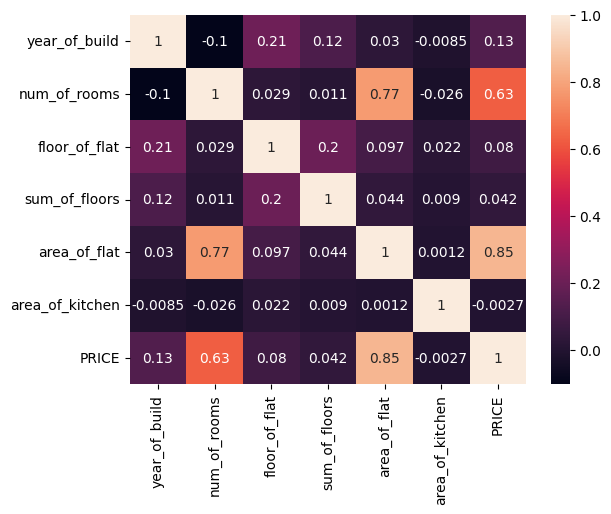

In [53]:
sns.heatmap(df.corr(),annot=True)

In [54]:
df.drop(['area_of_kitchen'],axis=1,inplace=True)
#deleting feature "area_of_kitchen" because of negative correlation and absence of values

In [55]:
df.head()

,year_of_build,description,date,rieltor,district,num_of_rooms,floor_of_flat,sum_of_floors,area_of_flat,PRICE
0,2012,кирпичный,Вчера,\nЧастное лицо\n,Алматы,3.0,3,10,80.0,26000000
1,2010,монолитный,15.05.24,\nЧастное лицо\n,Алматы,2.0,13,17,70.0,26000000
2,2023,монолитный,02.05.24,\nNur Astana Kurylys (застройщик)\n,Алматы,2.0,10,21,63.3,24687000
3,2014,монолитный,Сегодня,\nKazRealty (агентство)\n,Алматы,3.0,6,23,100.0,62500000
4,2023,кирпичный,Сегодня,\nЧастное лицо\n,Алматы,1.0,7,9,38.0,15800000


Data correction on features of date and rieltor

In [56]:
df['date'] = df['date'].replace('Сегодня','17.05.24')

In [57]:
df['date'] = df['date'].replace('Вчера','17.05.24')

In [58]:
df['rieltor'].unique()

array(['\nЧастное лицо\n', '\nNur Astana Kurylys (застройщик)\n',
       '\nKazRealty (агентство)\n',
       '\nКадырбек Хамзин, компания «Этажи»\n',
       '\nАнтон, компания «Arbat Real Estate»\n',
       '\nСтоличный Дом (агентство)\n',
       '\nСабина Абдрахманова, компания «Этажи»\n',
       '\nАйгерим Шахметова, компания «Этажи»\n',
       '\nЖанболат Баянов, компания «Этажи»\n',
       '\nАйгерим Каргина, компания «Этажи»\n',
       '\nГазиз Суйеншбаев, компания «Этажи»\n',
       '\nНурлыбек Молдагали, компания «Этажи»\n',
       '\nИрина Джулумова, компания «Этажи»\n',
       '\nСагила Сиюбаева, компания «Этажи»\n',
       '\nАкжаркын Абдыкалыкова, компания «Этажи»\n',
       '\nЕрмек Хабзулин, компания «Этажи»\n',
       '\nАлександр Егошин, компания «Этажи»\n',
       '\nАдолат Султанкулова, компания «Этажи»\n',
       '\nСауле Успанова, компания «Этажи»\n',
       '\nАрайлым Казали, компания «Этажи»\n',
       '\nАлия Есимова, компания «Этажи»\n',
       '\nЖанат Темирхано

In [59]:
df.shape

(20767, 10)

In [60]:
count = 0
for elem in df['rieltor']:
    if 'компания' in elem:
        count+=1
count

20163

In [61]:
count = 0
for elem in df['rieltor']:
    if 'агентство' in elem:
        count+=1
count

160

In [62]:
count = 0
for elem in df['rieltor']:
    if 'Частное лицо' in elem:
        count+=1
count

349

In [63]:
count = 0
for elem in df['rieltor']:
    if 'риэлтор' in elem:
        count+=1
count

73

In [64]:
count = 0
for elem in df['rieltor']:
    if 'застройщик' in elem:
        count+=1
count

22

In [65]:
df['rieltor'].mask(df['rieltor'].str.contains('застройщик') == True, 'Застройщик', inplace=True)

In [66]:
df['rieltor'].mask(df['rieltor'].str.contains('риэлтор') == True, 'Риэлтор', inplace=True)

In [67]:
df['rieltor'].mask(df['rieltor'].str.contains('агентство') == True, 'Агентство', inplace=True)

In [68]:
df['rieltor'].mask(df['rieltor'].str.contains('Частное лицо') == True, 'Частное лицо', inplace=True)

In [69]:
df['rieltor'].mask(df['rieltor'].str.contains('Риэлторы') == True, 'Компания "Риэторы Астаны" ', inplace=True)

In [70]:
df['rieltor'].mask(df['rieltor'].str.contains('Этажи') == True, 'Компания "Этажы" ', inplace=True)

In [71]:
df['rieltor'].mask(df['rieltor'].str.contains('Arbat Real Estate') == True, 'Компания "Arbat Real Estate" ', inplace=True)

In [72]:
df['rieltor'].mask(df['rieltor'].str.contains('Sdelka') == True, 'Компания "Sdelka Plus" ', inplace=True)

In [73]:
df[df['rieltor'].str.contains('компания')]['rieltor'].value_counts()

\nАлия Молкубаева, компания «Prospekt»\n                                18
\n \nАйнур Жакенова, компания «Prospekt»\n                              14
\nАлия Шершат, компания «Prospekt»\n                                     5
\nАндрей, компания «Prime NS»\n                                          4
\n \nАнатолий Флек, компания «СНС (Союз независимых специалистов)»\n     2
Name: rieltor, dtype: int64

In [74]:
df['rieltor'].mask(df['rieltor'].str.contains('Prospekt') == True, 'Компания "Prospekt" ', inplace=True)

In [75]:
df['rieltor'].mask(df['rieltor'].str.contains('Prime NS') == True, 'Компания "Prime NS" ', inplace=True)

In [76]:
df['rieltor'].mask(df['rieltor'].str.contains('СНС') == True, 'Компания "СНС" ', inplace=True)

In [77]:
df['rieltor'].value_counts()

Компания "Этажы"                 20017
Частное лицо                       349
Агентство                          160
Компания "Sdelka Plus"              94
Риэлтор                             73
Компания "Prospekt"                 37
Застройщик                          22
Компания "Риэторы Астаны"            5
Компания "Arbat Real Estate"         4
Компания "Prime NS"                  4
Компания "СНС"                       2
Name: rieltor, dtype: int64

# Data Vizualization

In [78]:
sns.set(rc={"figure.figsize":(6,3)}) 

<AxesSubplot: xlabel='district', ylabel='count'>

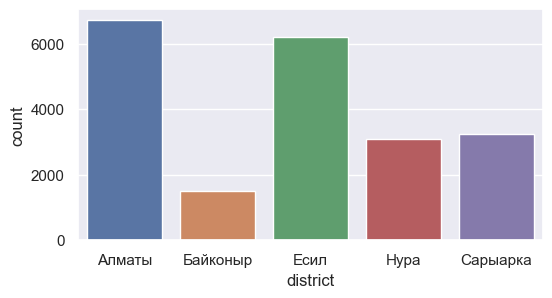

In [79]:
sns.countplot(x=df['district'],data=df)

<AxesSubplot: xlabel='description', ylabel='count'>

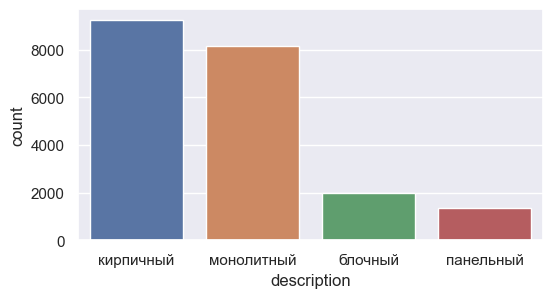

In [80]:
sns.countplot(x=df['description'],data=df)

<AxesSubplot: xlabel='district', ylabel='PRICE'>

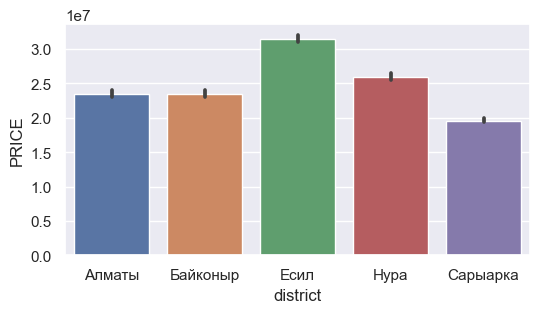

In [81]:
sns.barplot(x=df['district'],y=df['PRICE'],data=df,estimator='median')

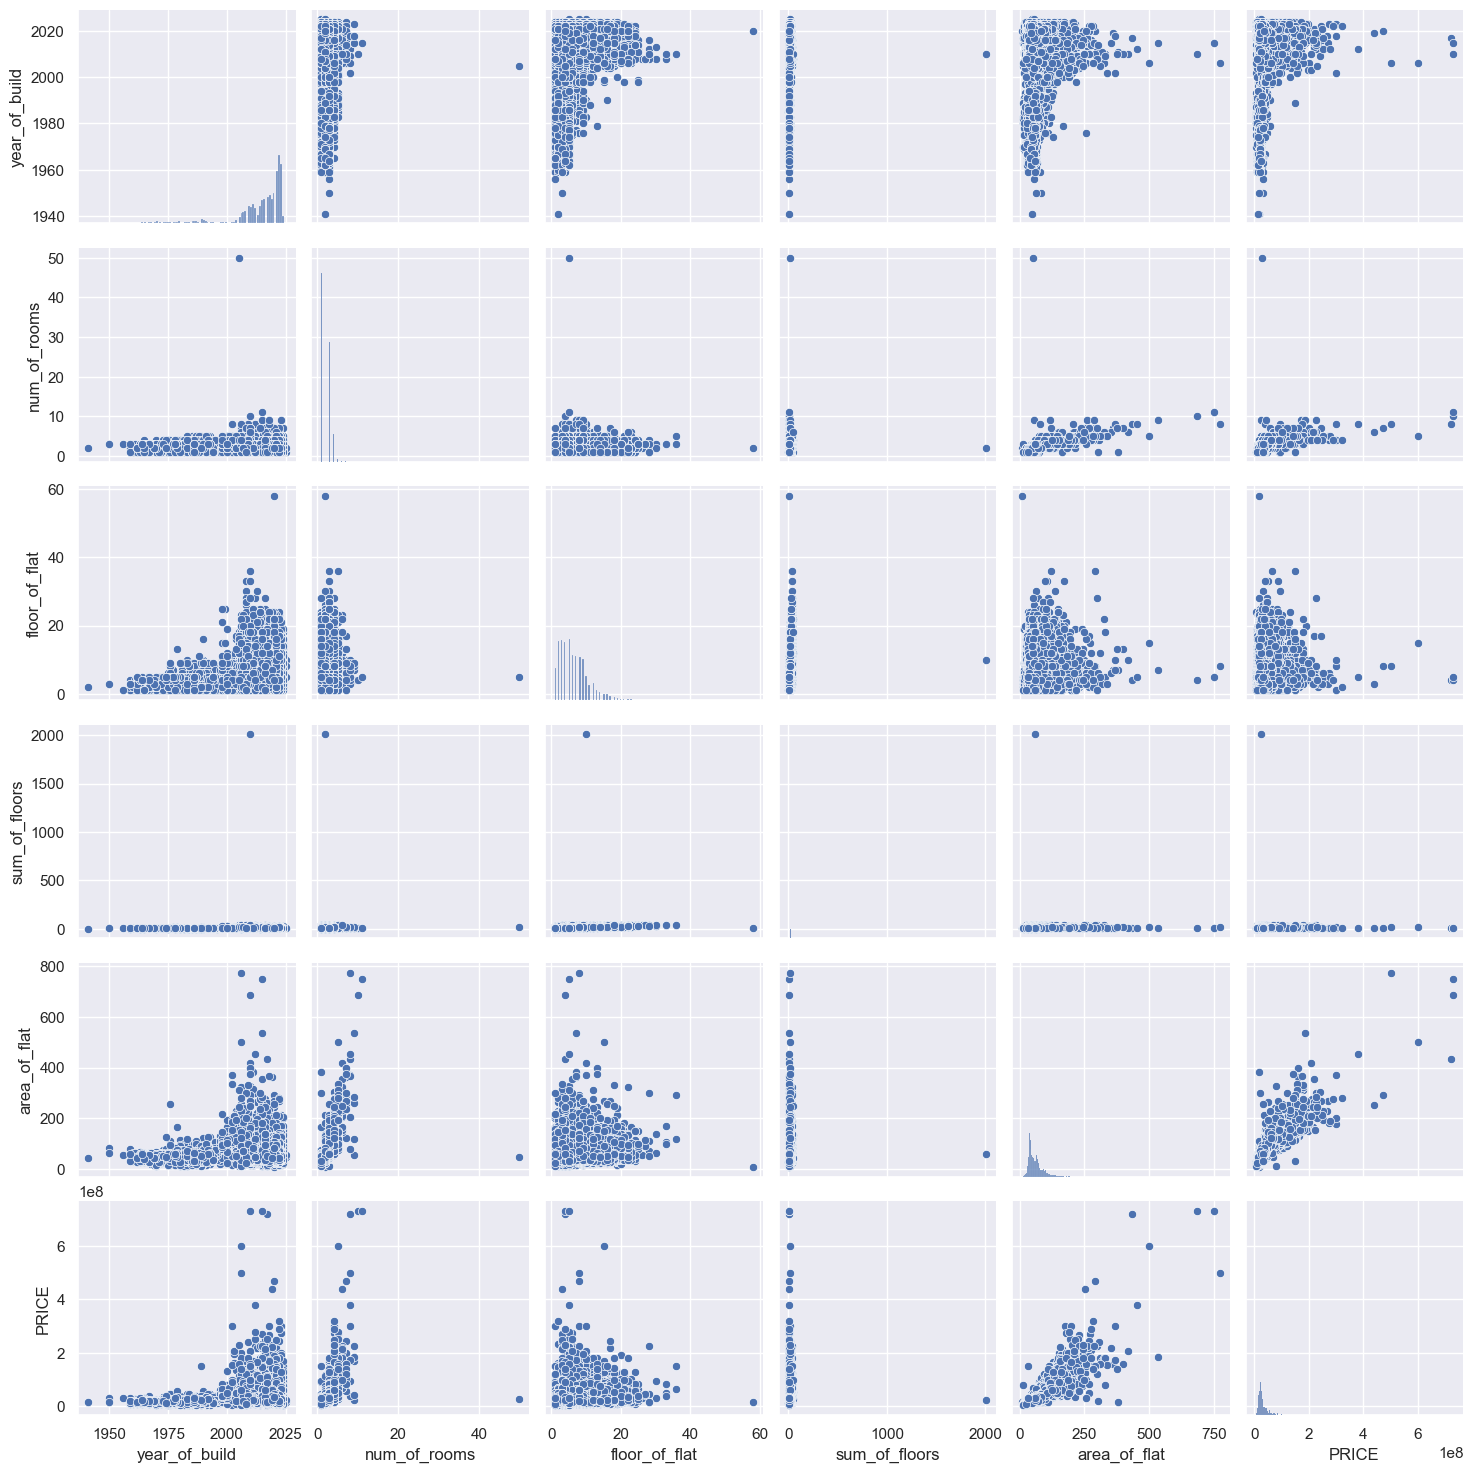

In [82]:
sns.pairplot(df)

In [83]:
df.drop_duplicates(inplace=True)

In [84]:
df.head()

,year_of_build,description,date,rieltor,district,num_of_rooms,floor_of_flat,sum_of_floors,area_of_flat,PRICE
0,2012,кирпичный,17.05.24,Частное лицо,Алматы,3.0,3,10,80.0,26000000
1,2010,монолитный,15.05.24,Частное лицо,Алматы,2.0,13,17,70.0,26000000
2,2023,монолитный,02.05.24,Застройщик,Алматы,2.0,10,21,63.3,24687000
3,2014,монолитный,17.05.24,Агентство,Алматы,3.0,6,23,100.0,62500000
4,2023,кирпичный,17.05.24,Частное лицо,Алматы,1.0,7,9,38.0,15800000


Removing outliers from our target variable

<AxesSubplot: xlabel='PRICE', ylabel='Count'>

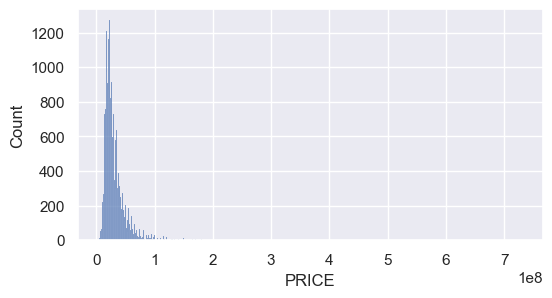

In [85]:
sns.histplot(x=df['PRICE'])

In [86]:
Q1 = df['PRICE'].quantile(0.25)
Q3 = df['PRICE'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['PRICE'] > lower_bound) & (df['PRICE'] < upper_bound)]

In [87]:
Q1 = df_filtered['PRICE'].quantile(0.25)
Q3 = df_filtered['PRICE'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df_filtered[(df_filtered['PRICE'] > lower_bound) & (df_filtered['PRICE'] < upper_bound)]

In [88]:
Q1 = df_filtered['PRICE'].quantile(0.25)
Q3 = df_filtered['PRICE'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df_filtered[(df_filtered['PRICE'] > lower_bound) & (df_filtered['PRICE'] < upper_bound)]

In [89]:
Q1 = df_filtered['PRICE'].quantile(0.25)
Q3 = df_filtered['PRICE'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df_filtered[(df_filtered['PRICE'] > lower_bound) & (df_filtered['PRICE'] < upper_bound)]

In [90]:
Q1 = df_filtered['PRICE'].quantile(0.25)
Q3 = df_filtered['PRICE'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df_filtered[(df_filtered['PRICE'] > lower_bound) & (df_filtered['PRICE'] < upper_bound)]

In [91]:
Q1 = df_filtered['PRICE'].quantile(0.25)
Q3 = df_filtered['PRICE'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df_filtered[(df_filtered['PRICE'] > lower_bound) & (df_filtered['PRICE'] < upper_bound)]

In [92]:
df_filtered.shape

(18422, 10)

<AxesSubplot: xlabel='PRICE'>

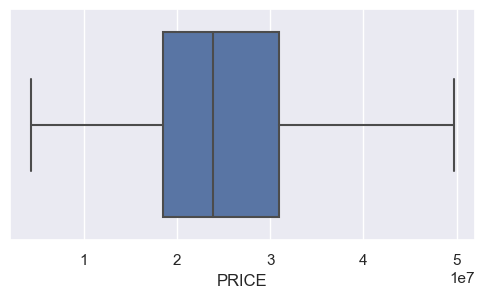

In [93]:
sns.boxplot(x=df_filtered['PRICE'])

In [94]:
df_filtered.head()

,year_of_build,description,date,rieltor,district,num_of_rooms,floor_of_flat,sum_of_floors,area_of_flat,PRICE
0,2012,кирпичный,17.05.24,Частное лицо,Алматы,3.0,3,10,80.0,26000000
1,2010,монолитный,15.05.24,Частное лицо,Алматы,2.0,13,17,70.0,26000000
2,2023,монолитный,02.05.24,Застройщик,Алматы,2.0,10,21,63.3,24687000
4,2023,кирпичный,17.05.24,Частное лицо,Алматы,1.0,7,9,38.0,15800000
5,2013,монолитный,17.05.24,Частное лицо,Алматы,2.0,12,12,77.0,26600000


In [96]:
df.describe()

,year_of_build,num_of_rooms,floor_of_flat,sum_of_floors,area_of_flat,PRICE
count,20754.000000,20754.000000,20754.000000,20754.000000,20754.000000,2.075400e+04
mean,2013.272381,2.008408,6.393466,11.353570,62.202133,3.119801e+07
std,12.509104,1.000501,4.138596,14.755904,32.497002,2.383638e+07
min,1941.000000,1.000000,1.000000,1.000000,9.000000,4.380000e+06
25%,2010.000000,1.000000,3.000000,9.000000,40.300000,1.900000e+07
50%,2017.000000,2.000000,6.000000,10.000000,54.500000,2.500000e+07
75%,2021.000000,3.000000,9.000000,14.000000,74.000000,3.550000e+07
max,2025.000000,50.000000,58.000000,2010.000000,773.300000,7.300000e+08


In [95]:
df_filtered.to_csv('filtered_updated_dataset_PowerBI.csv',index=False)